### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Swimming']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 0       Swimming
1       Swimming
2       Swimming
3       Swimming
4       Swimming
          ...   
4362    Swimming
4363    Swimming
4364    Swimming
4365    Swimming
4366    Swimming
Name: Sport, Length: 4367, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 0           NA
1           NA
2           NA
3           NA
4           NA
         ...  
4362        NA
4363    Bronze
4364        NA
4365        NA
4366    Silver
Name: Medal, Length: 4367, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4367 entries, 0 to 4366
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4367 non-null   int64  
 1   Unnamed: 0_x    4367 non-null   int64  
 2   ID              4367 non-null   int64  
 3   Name            4367 non-null   object 
 4   Sex             4367 non-null   object 
 5   Age             4367 non-null   float64
 6   Height          4367 non-null   float64
 7   Weight          4367 non-null   float64
 8   NOC             4367 non-null   object 
 9   Games           4367 non-null   object 
 10  Year            4367 non-null   int64  
 11  Season          4367 non-null   object 
 12  City            4367 non-null   object 
 13  Sport           4367 non-null   object 
 14  Event           4367 non-null   object 
 15  Medal           4367 non-null   object 
 16  Team            4367 non-null   object 
 17  Unnamed: 0_y    4367 non-null   f

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (3275, 1) (3275, 6)
Test Set  : (1092, 1) (1092, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
423,21.0,82.0,187.0,4.300000e+11,8.321496e+06,51673.401033,NA
475,20.0,69.0,188.0,2.954944e+10,2.730280e+07,1082.286025,NA
650,19.0,71.0,188.0,1.280000e+12,1.443424e+08,8867.803469,NA
3338,31.0,78.0,182.0,3.750000e+12,8.211010e+07,45670.388138,NA
2836,16.0,65.0,166.0,8.605503e+08,6.216205e+06,138.436603,NA
...,...,...,...,...,...,...,...
1440,21.0,83.0,185.0,1.260000e+11,5.176209e+06,24342.139199,NA
4084,23.0,84.0,192.0,8.290000e+11,1.675496e+07,49477.880045,NA
3077,27.0,68.0,185.0,1.860000e+12,6.060059e+07,30692.770483,NA
2926,24.0,82.0,185.0,2.290000e+11,4.700170e+07,4872.164096,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        3892
Gold       171
Silver     159
Bronze     145
Name: Medal, dtype: int64


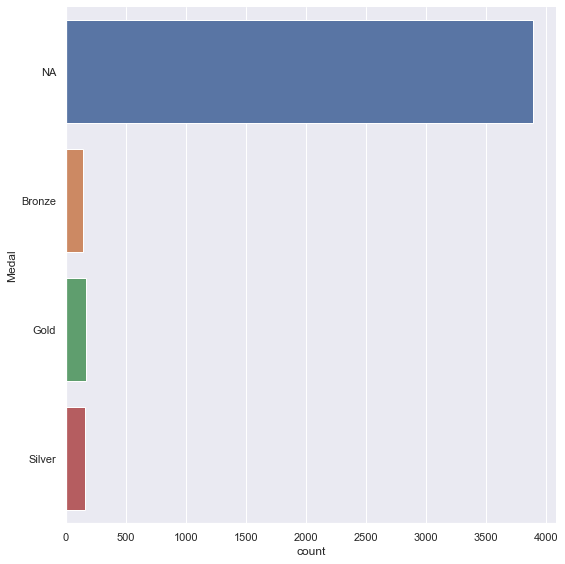

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(3275, 6) (3275, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(11680, 6) (11680, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,21.000000,82.000000,187.000000,4.300000e+11,8.321496e+06,51673.401033,NA
1,20.000000,69.000000,188.000000,2.954944e+10,2.730280e+07,1082.286025,NA
2,19.000000,71.000000,188.000000,1.280000e+12,1.443424e+08,8867.803469,NA
3,31.000000,78.000000,182.000000,3.750000e+12,8.211010e+07,45670.388138,NA
4,16.000000,65.000000,166.000000,8.605503e+08,6.216205e+06,138.436603,NA
...,...,...,...,...,...,...,...
11675,26.262282,80.437137,188.631141,2.470000e+12,6.689611e+07,36922.924770,Silver
11676,23.313943,87.627885,195.027085,1.099418e+13,1.127910e+09,14613.903329,Silver
11677,27.683135,83.762352,188.000000,1.030000e+13,2.821624e+08,36503.799225,Silver
11678,31.834789,96.264495,191.264495,1.620000e+13,3.139984e+08,51592.623031,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
982,26.0,70.000000,175.000000,1.760000e+11,45593300.0,3860.216304
4014,26.0,80.000000,193.000000,6.510000e+11,16281779.0,39983.345800
1364,20.0,83.000000,187.000000,2.650000e+12,65637239.0,40373.422776
1417,25.0,99.000000,198.000000,1.030000e+13,282162411.0,36503.799225
2464,27.0,87.000000,189.000000,1.760000e+11,4408100.0,39926.498945
...,...,...,...,...,...,...
3017,31.0,91.000000,193.000000,1.860000e+13,323127513.0,57562.414996
3892,19.0,79.183206,186.564885,2.407893e+10,41487965.0,580.383539
670,23.0,80.000000,192.000000,1.820000e+12,34750545.0,52373.279326
624,22.0,73.000000,180.000000,6.488306e+10,47451600.0,1367.352433


Number of Medal Types : 4
Bronze    2920
Gold      2920
NA        2920
Silver    2920
Name: Medal, dtype: int64


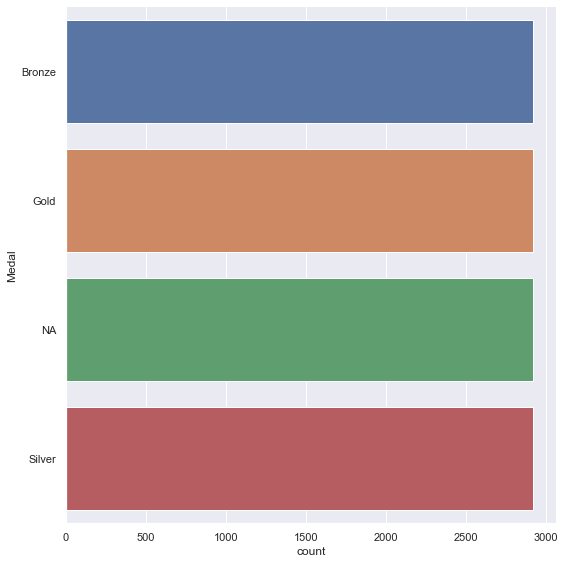

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (8760, 1) (8760, 6)
Test Set  : (2920, 1) (2920, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.897945205479452

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8496575342465753



<AxesSubplot:>

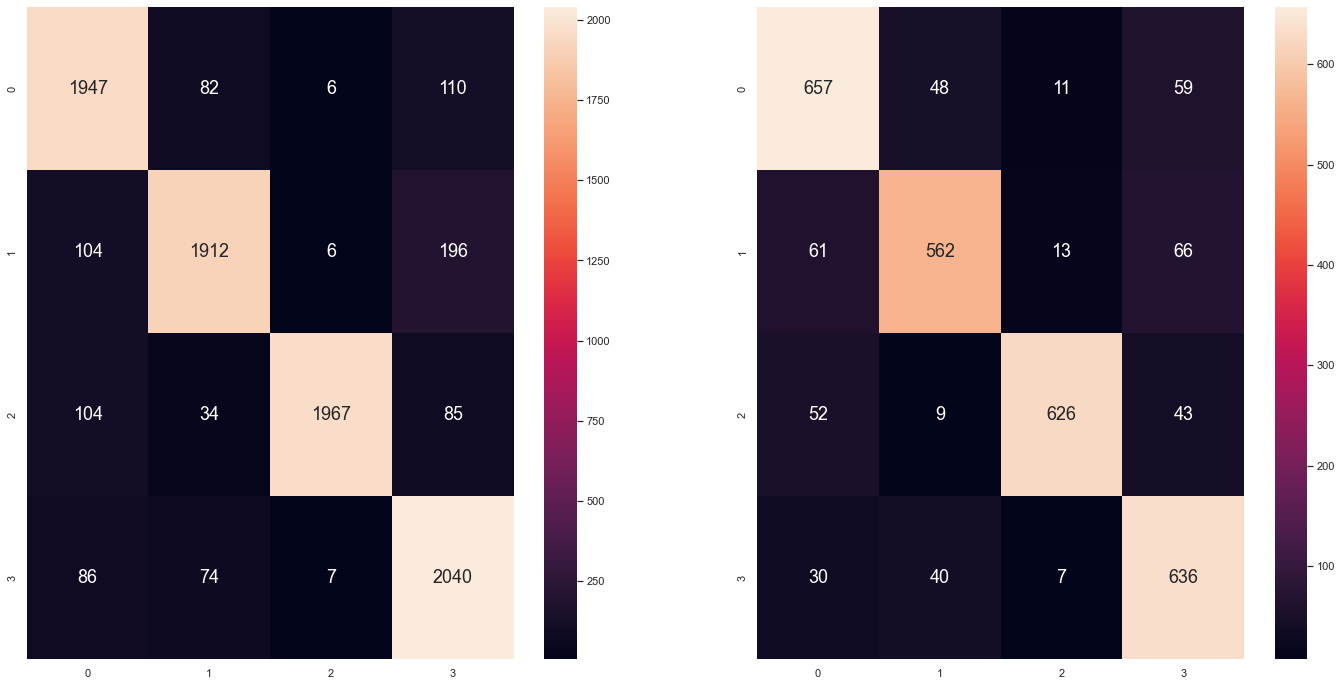

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

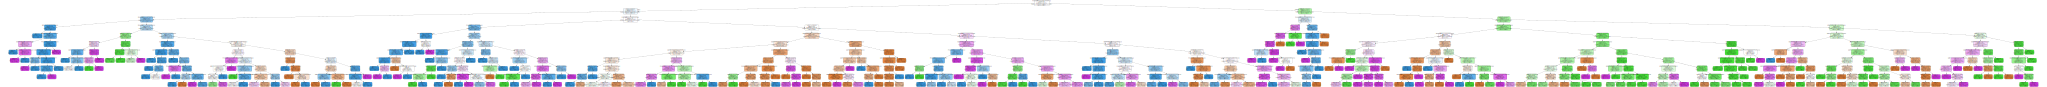

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8040293040293041


<AxesSubplot:>

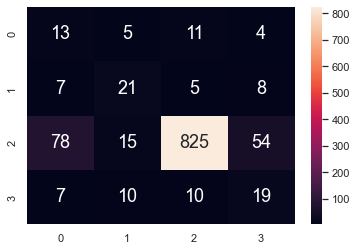

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})